# Imports

In [9]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

In [2]:
pd.set_option('max_colwidth', 250)

In [4]:
df = pd.read_csv('Datasets/5k_jan_thru_may_tweets.csv', index_col=0)
df.shape

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 19)

In [5]:
df['date'] = pd.to_datetime(df['date'])

# EDA

In [6]:
df.head()

,id,conversation_id,created_at,date,tweet,hashtags,user_id,username,name,link,retweet,nlikes,nreplies,nretweets,quote_url,retweet_id,reply_to,sentiment_score,sentiment
0,1.212523e+18,1.212523e+18,1.577923e+12,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the death mask of Thomas, an unknown peasant that died in a river.""",[],8.431951e+17,Best_of_MLTSHP,MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212523477896294400,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '843195118924546048', 'username': 'Best_of_MLTSHP'}]",-0.8176,negative
1,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,Ready to heard this? Homemade hair treatment and ann cherry dead sea mud mask... Fucking putas swear they are more woman than me.... Bitch shut the fuck up pic.twitter.com/YVsuQkk51k,[],1.044739e+18,lumora_lu,MiLu,https://twitter.com/lumora_lu/status/1212518043353530368,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '1044738746913034241', 'username': 'lumora_lu'}]",-0.8905,negative
2,1.212518e+18,1.212518e+18,1.577922e+12,2020-01-01,"We all know what a joke #CCPChina is when it comes to epidemic outbreak,think of how they stayed silent about #SARS.\nDear world,stay away from #HK im sure the infected are amongst us already.\nDear fellow #HKers, wear a mask😷its the least we can...","['#ccpchina', '#sars', '#hk', '#hkers']",9.630325e+17,odiecher,odiecher,https://twitter.com/odiecher/status/1212517557690748928,False,1.0,1.0,1.0,https://twitter.com/WBYeats1865/status/1212430526826479616,NaN,"[{'user_id': '963032516759207936', 'username': 'odiecher'}]",0.6705,positive
3,1.212516e+18,1.200523e+18,1.577921e+12,2020-01-01,Thought death masks gave you the horn freak,[],2.819219e+09,Hevysmoker,Ashley Collins,https://twitter.com/Hevysmoker/status/1212515585562726401,False,0.0,0.0,0.0,NaN,NaN,"[{'user_id': '2819219369', 'username': 'Hevysmoker'}, {'user_id': '1107018506300780544', 'username': 'cutedeadguys3'}]",-0.7783,negative
4,1.212510e+18,1.212391e+18,1.577920e+12,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔\nelectronically posing as he did as of the CIA while Brennan was Chief. 🧐",[],2.361956e+08,FaithR8s,❌Patriot Fan🇺🇸🗽☕️🎶❌,https://twitter.com/FaithR8s/status/1212510409858670593,False,1.0,0.0,1.0,NaN,NaN,"[{'user_id': '236195607', 'username': 'FaithR8s'}, {'user_id': '14745988', 'username': 'ThunderB'}, {'user_id': '14138785', 'username': 'TelegraphNews'}]",-0.2960,negative


In [7]:
df.keys()

Index(['id', 'conversation_id', 'created_at', 'date', 'tweet', 'hashtags',
       'user_id', 'username', 'name', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'retweet_id', 'reply_to', 'sentiment_score',
       'sentiment'],
      dtype='object')

In [8]:
# Proportion of sentiments by day
df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

sentiment,negative,neutral,positive
date,,,
2020-01-01,0.692308,0.054945,0.252747
2020-01-02,0.566879,0.089172,0.343949
2020-01-03,0.602564,0.108974,0.288462
2020-01-04,0.587097,0.083871,0.329032
2020-01-05,0.500000,0.097701,0.402299
...,...,...,...
2020-05-27,0.425400,0.180400,0.394200
2020-05-28,0.421400,0.177800,0.400800
2020-05-29,0.395200,0.148600,0.456200


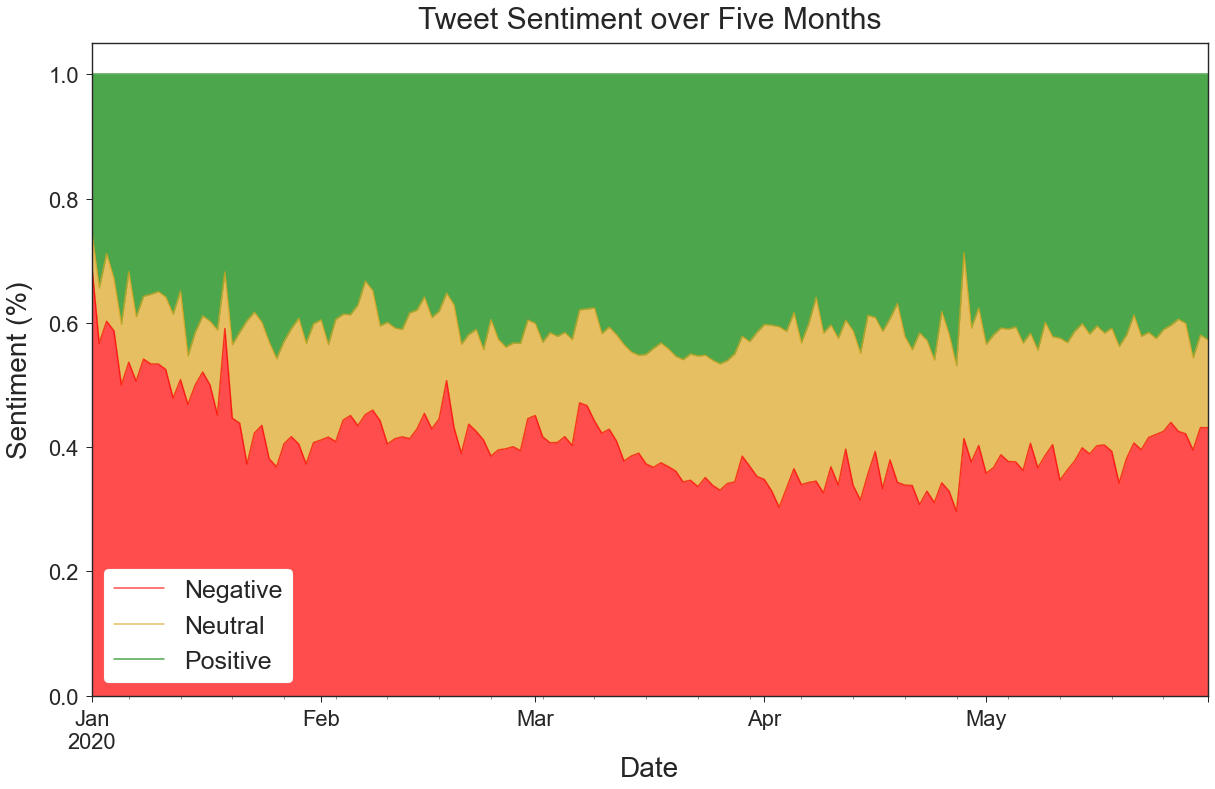

In [28]:
# Proportion of sentiments by day
sent_by_day = df.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Tweet Sentiment over Five Months', fontsize=30, pad=15)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22)

# plt.savefig('sentiment_stacked_line.png')
# plt.show()

In [32]:
# Create dataframe of top twenty tweets per day by likes
top_20_by_day = []
for i in df.groupby('date')['nlikes'].nlargest(20).index:
    top_20_by_day.append(i[1])
    
top_20_by_day = df.loc[top_20_by_day]
top_20_by_day.shape

(3040, 19)

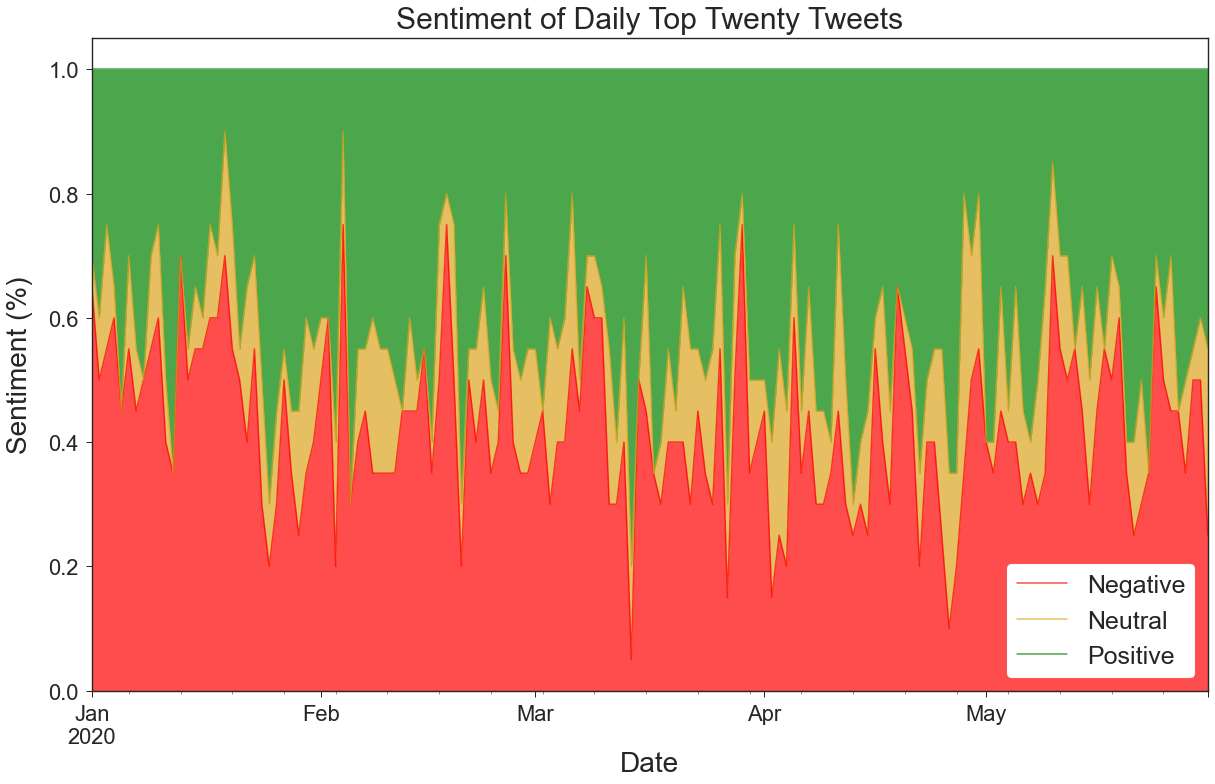

In [35]:
# Proportion of sentiments of top twenty tweets by day
sent_top_20_by_day = top_20_by_day.groupby('date')['sentiment'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = sent_top_20_by_day.plot.area(stacked = True, figsize=(20,12),
                           color = ['red', 'goldenrod', 'green'], alpha = .70, fontsize=14)

p1.set_title('Sentiment of Daily Top Twenty Tweets', fontsize=30, pad=10)
p1.set_xlabel('Date', fontsize=28)
p1.set_ylabel('Sentiment (%)', fontsize=28, labelpad=15)
plt.setp(p1.get_xticklabels(), fontsize=22)
plt.setp(p1.get_yticklabels(), fontsize=22)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1, fontsize=25)

# p1.show()

In [12]:
# Top 100 tweets by number of likes
top_100_likes = df['nlikes'].sort_values(ascending=False).head(100).index
top_100_likes = df.loc[top_100_likes]

In [13]:
top_100_likes['sentiment'].value_counts()

negative    46
positive    40
neutral     14
Name: sentiment, dtype: int64

In [14]:
# Top 1000 tweets by number of likes
top_1000_likes = df['nlikes'].sort_values(ascending=False).head(1000).index
top_1000_likes = df.loc[top_1000_likes]

In [15]:
top_1000_likes['sentiment'].value_counts()

positive    451
negative    410
neutral     139
Name: sentiment, dtype: int64

In [16]:
# Top 10000 tweets by number of likes
top_10000_likes = df['nlikes'].sort_values(ascending=False).head(10000).index
top_10000_likes = df.loc[top_10000_likes]

In [17]:
top_10000_likes['sentiment'].value_counts()

positive    4474
negative    3932
neutral     1594
Name: sentiment, dtype: int64

In [23]:
# Create dataframes for positive, neutral and negative sentiment
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']
negative_df = df[df['sentiment'] == 'neutral']

positive_df.shape, neutral_df.shape, negative_df.shape

((239200, 19), (115386, 19), (115386, 19))

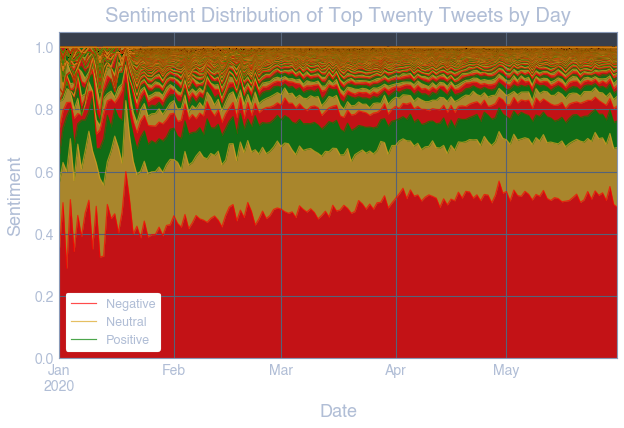

In [24]:
# Proportion of sentiments of top twenty tweets by day
positive_likes = positive_df.groupby('date')['nlikes'].value_counts(normalize=True).unstack()

# Plot a stacked line graph
p1 = positive_likes.plot.area(stacked = True, figsize=(10,6), alpha = .70, fontsize=14)

p1.set_title('Sentiment Distribution of Top Twenty Tweets by Day', fontsize=20, pad=10)
p1.set_xlabel('Date', fontsize=18, labelpad=10)
p1.set_ylabel('Sentiment', fontsize=18, labelpad=10)
p1.legend(['Negative', 'Neutral', 'Positive'], facecolor='white', framealpha=1)
# p1.show()